# Exercise 5: matplotlib

## Aim: Get to grips with how to create plots and customise them with matplotlib

### Issues covered:

- Creating plots
- Parts of a figure
- Styling the colours, linestyles, linewidths, markersizes etc
- Labelling plots: axis labels, titles, annotations and legends
- Axes properties: scales, ticks, plotting dates and strings
- Multiple figures, multiple axes,
- Colour-mapped data: colormaps, colorbars, normalizations

## 1. Simple example

1. Let's create some sample data to plot. Create an array called xaxis with the value [1,2,3,4,5] and an array called yaxis with the value [2, 16, 4, 8, 7]. Plot this data on a single axes. Don't forget to import matplotlib!

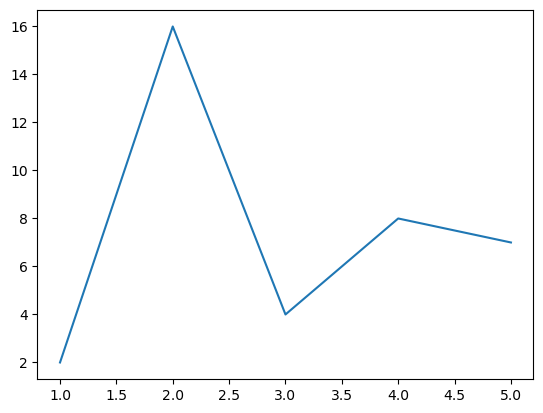

In [1]:
import matplotlib.pyplot as plt
xaxis = [1, 2, 3, 4, 5]
yaxis = [2, 16, 4, 8, 7]
fig, ax = plt.subplots()
ax.plot(xaxis, yaxis)
plt.show()

## 2. Parts of a figure

2. Create 6 empty plots in a 2x3 grid.

<Figure size 640x480 with 0 Axes>

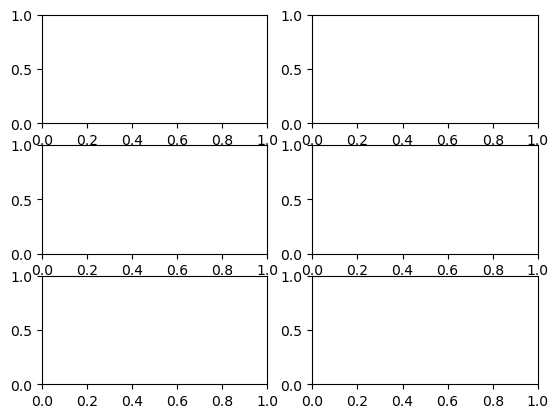

In [2]:
fig = plt.figure()
fig, axs = plt.subplots(3,2)

## 3. Types of inputs to plotting functions

3. Some inputs won't work as intended. Create a pandas dataframe as follows: 

```
df = pd.DataFrame({
    'A': [1, 2, 3, 4],
    'B': [4, 5, 6, 7],
    'C': ['a', 'b', 'c', 'd']
})
```
Try plotting the dataframe directly. Do you know why there is an error?

ConversionError: Failed to convert value(s) to axis units: array(['a', 'b', 'c', 'd'], dtype=object)

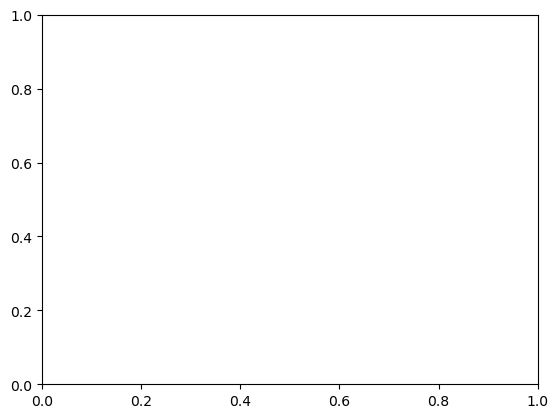

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({
    'A': [1, 2, 3, 4],
    'B': [5, 6, 7, 8],
    'C': ['a', 'b', 'c', 'd']
})
fig, ax = plt.subplots()
plt.plot(df)
plt.show()

4. We need to extract only the numeric values to plot. Let's extract them as a numpy array and try again. Use `np.asarray(df[['A', 'B']])` to create a numpy array from the numeric data. Try plotting it now.

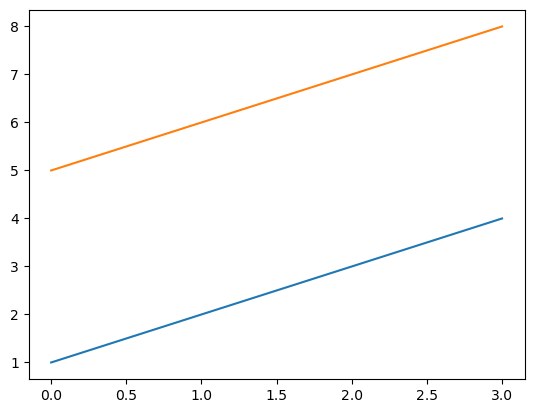

In [4]:
import matplotlib.pyplot as plt
import numpy as np

df_array = np.asarray(df[['A', 'B']])
plt.plot(df_array)

5. Let's unpack the example given in the tutorial of using matplotlib with string-indexable objects. Instead of passing numpy arrays directly, we'll pass the names of the variables as strings.

Let's start by creating the dictionary. Create a variable called data using the following: 
```
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
```
Here, a is a numpy array of integers from 0 to 49, c is random integers between 0 and 50 we can use as the colour, and d is the absolute value of randomly generated numbers which we will use as the size of each scatter point.

In [5]:
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}

6. Let's add to our dictionary. Give `data['b']` the value `data['a'] + 10 * np.random.randn(50)`. This is essentially just a noisy version of 'a'. Then edit `data['d']` to be `np.abs(data['d']) * 100` which is just scaling 'd' to be larger.

In [6]:
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

7. Now we can plot the scatter plot using the syntax `ax.scatter(xvalues, yvalues, c=colours, s=scatter_point_size, data=data). Hint: the x and y data is 'a' and 'b' and you should know what the colour and size is.

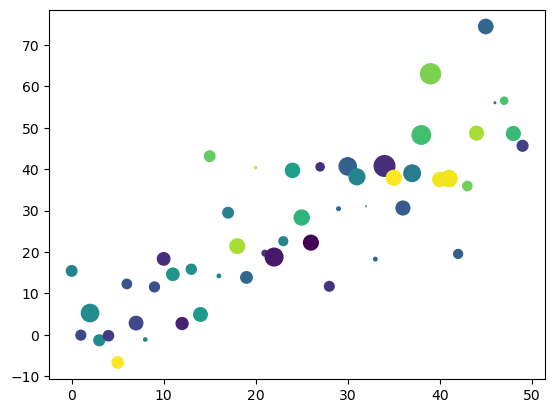

In [7]:
fig, ax = plt.subplots()
ax.scatter('a', 'b', c='c', s='d', data=data)

## 4. Coding styles

8. So far, we've been creating plots in the object oriented way: explicitly creating figures and axes. The pyplot-style is very subtly different - we just don't need to create the axis or subplots. Create x axis data using `np.linspace(min, max, num)`. Create 10 values between 0 and 10. Create y axis data using `np.linspace` to create 10 values between 0 and 100. Plot this data on the implicit axes using `plt.plot()` - don't worry about seeting the figsize and layout.

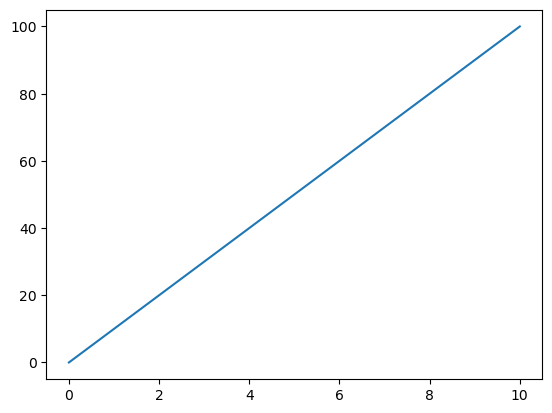

In [8]:
x = np.linspace(0, 10, 10)
y = np.linspace(0, 100, 10)
plt.plot(x, y)

## 5. Styling

9. Let's use the x and y values from before and create some new y values to practice styling plots. Create `y2 = np.linspace(0, -100, 10)`. Plot both of these sets of data on the same axes using the Styling Artists example. Plot the original y data in purple with the -- linestyle and the new y data in green with the : linestyle. What other values can you give for linestyle? Try editing them to be any character you want and see what happens! Can you make the lines thicker?

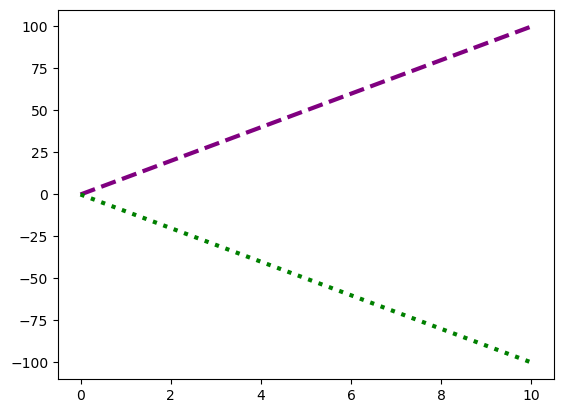

In [9]:
y2 = np.linspace(0, -100, 10)
fig, ax = plt.subplots()
ax.plot(x, y, color='purple', linestyle='--', linewidth='3')
ax.plot(x, y2, color='green', linestyle=':', linewidth='3')
# If you try plotting with the linestyle 'x' you will get an error saying 'x' is not a valid value for ls; supported values are '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'

10. There are lots of different customisation options in matplotlib for colour! You can even have different colours for the markers and outlines in a scatter plot. Use the following to generate some data for a scatter plot:
```
data1, data2 = np.random.randn(2,100)
```
Plot this data as an `ax.scatter` plot, using a magenta outline with a green marker. Hint: you'll need to visit the [allowable color definitions](https://matplotlib.org/stable/users/explain/colors/colors.html#colors-def) page to see how colours are defined.

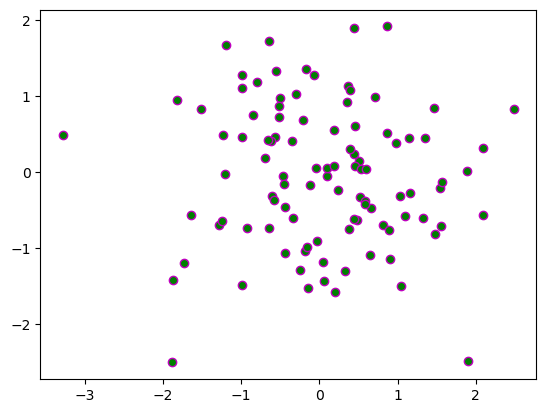

In [10]:
data1, data2 = np.random.randn(2, 100)
fig, ax = plt.subplots()
ax.scatter(data1, data2, facecolor='g', edgecolor='m')

11. Generate two more scatter plot datasets as we did above then plot all 4 on one graph. Give each dataset a label and a different marker style - e.g. stars ('*'), plus ("P") or diamonds ("D"). You can see more options for markers [in the documentation](https://matplotlib.org/stable/gallery/lines_bars_and_markers/marker_reference.html).

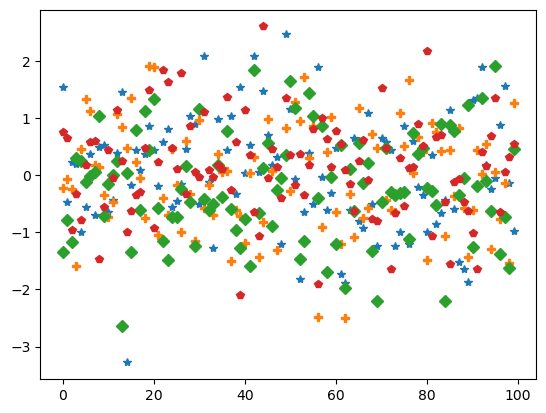

In [11]:
import matplotlib.path as mpath
data3, data4 = np.random.randn(2, 100)
star = mpath.Path.unit_regular_star(6)
fig, ax = plt.subplots()
ax.plot(data1, '*', label='data1')
ax.plot(data2, 'P', label='data2')
ax.plot(data3, 'D', label='data3')
ax.plot(data4, 'p', label='data4')

## 6. Labelling

12. Take the plot we just used and give it x label, y label and a title. Add some text to the plot saying 'text' right in the middle. Add an annotation at top saying 'some annotation' with a black arrow pointing to some data. Also add a legend identifying each data set.

Text(3, 1.5, 'some annotation')

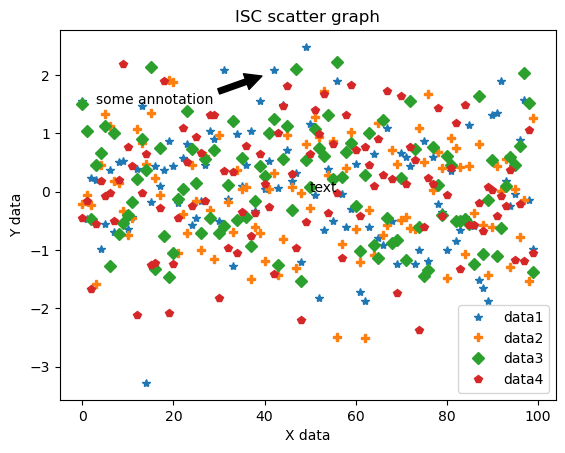

In [12]:
import matplotlib.path as mpath
data3, data4 = np.random.randn(2, 100)
star = mpath.Path.unit_regular_star(6)
fig, ax = plt.subplots()
ax.set_xlabel('X data')
ax.set_ylabel('Y data')
ax.set_title('ISC scatter graph')
ax.text(50, 0, 'text')
ax.plot(data1, '*', label='data1')
ax.plot(data2, 'P', label='data2')
ax.plot(data3, 'D', label='data3')
ax.plot(data4, 'p', label='data4')
ax.legend()
ax.annotate('some annotation', xy=(40,2), xytext=(3,1.5), arrowprops=dict(facecolor='black', shrink=0.05))

## 7. Axes

13. Let's practice plotting some log scale data. Create the xdata using `xdata = np.arange(5)`. Create the ydata using `ydata = np.array([0.1, 0.5, 1, 5, 10])`. Transform the y data by raising it to the power of 10 using `ydata = 10**ydata`. Plot two suplots - plot the x and y data in both plots. Set the y-axis of the second subplot to a logairthmic scale. Try experimenting with different datasets by changing the values in ydata. Try changing the base of the log scale - e.g. using base=2.

Text(0.5, 1.0, 'Logarithmic scale')

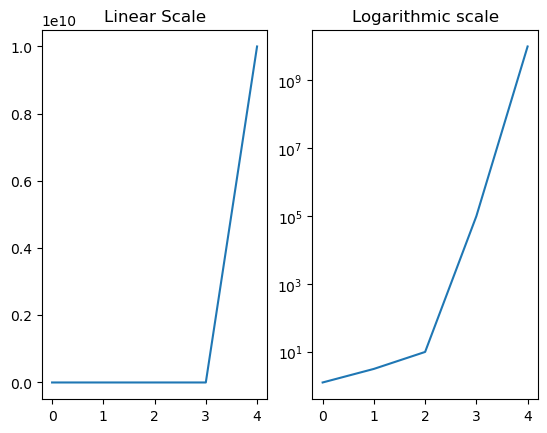

In [13]:
xdata = np.arange(5)
ydata = np.array([0.1, 0.5, 1, 5, 10])
ydata = 10**ydata
fig, axs = plt.subplots(1,2)
axs[0].plot(xdata, ydata)
axs[0].set_title('Linear Scale')
axs[1].set_yscale('log')
axs[1].plot(xdata, ydata)
axs[1].set_title('Logarithmic scale')

14. To demonstrate the difference between automatic and manual ticks, let's create two subplots. Follow the folliwng steps:

- Create some data using `xdata = np.linspace(0, 99, 100)`, and `ydata = np.sin(xdata / 10)`
- Create a figure with 2 subplots arranged vertically.
- For the first subplot, plot the data and allow matplotlib to automatically place the ticks on the y and x axes
- For the second subplot, manually set the x-axis ticks at intervals of 30 using `np.arange(0,100,30)`, provide custom labels for these x-ticks using `('zero', '30', 'sixty', '90')` and manually set the yaxis ticks at `[-1.5, 0, 1.5]` without specifying labels so that default labels are used.
- Add titles to both subplots to distinguish between automatic and manual ticks.

Text(0.5, 1.0, 'Manual Ticks')

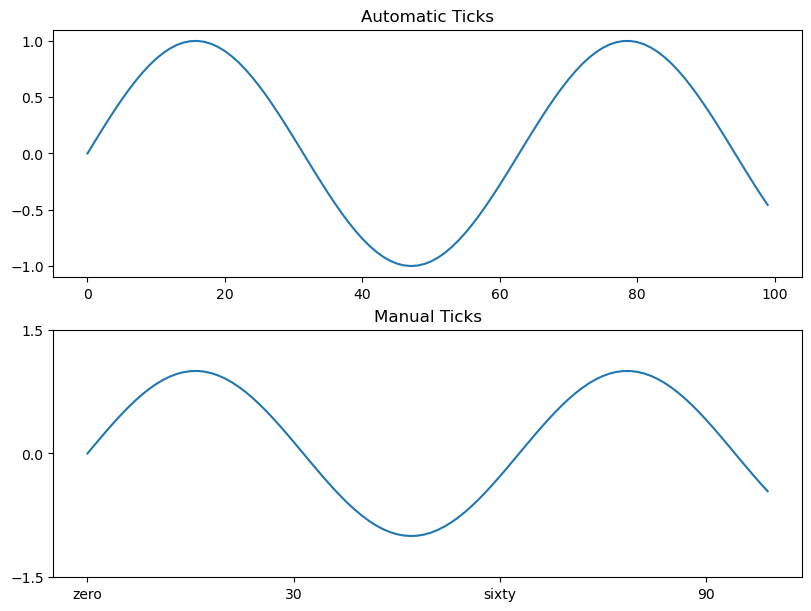

In [14]:
xdata = np.linspace(0, 99, 100)
ydata = np.sin(xdata / 10)

fig, axs = plt.subplots(2, 1, figsize=(8,6), layout='constrained')

axs[0].plot(xdata, ydata)
axs[0].set_title('Automatic Ticks')

axs[1].plot(xdata, ydata)
axs[1].set_xticks(np.arange(0,100,30), ['zero', '30', 'sixty', '90'])
axs[1].set_yticks([-1.5, 0, 1.5])
axs[1].set_title('Manual Ticks')

15. Let's see how matplotlib handles plotting dates. We'll create a time series plot using an array of dates and random cumulative data:
- Generate a numpy array of dates starting from `2022-01-01` to `2022-01-10` at intervals of 3 hours using `dates=np.arange(np.datetime64('2022-01-01'), np.datetime64('2022-01-10'), np.timedelta64(3, 'h'))`
- Creative a cumulative sum of random numbers for the same length of the array of dates using `data=np.cumsum(np.random.randn(len(dates)))`
- Plot the data with the dates on the x axis and `data` on the y axis.

Take a look at the dates if we don't format the axis - do they look all bunched up?
- Format the x-axis with `ConciseDateFormatter` for better readability of the date ticks

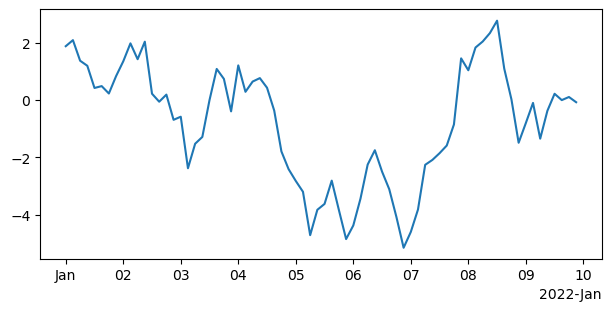

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import ConciseDateFormatter

dates = np.arange(np.datetime64('2022-01-01'), np.datetime64('2022-01-10'), np.timedelta64(3, 'h'))
data = np.cumsum(np.random.randn(len(dates)))

fig, ax = plt.subplots(figsize=(6, 3), layout='constrained')
ax.plot(dates, data)

ax.xaxis.set_major_formatter(ConciseDateFormatter(ax.xaxis.get_major_locator()))

16. Let's have a go at plotting some categorical data. We'll create a bar chart using a list of categories and random values:
- Define a list of four fruit names `['apple', 'banana', 'cherry', 'date']`
- Generate random data for these categories using `np.random.rand()`
- Create a bar plot using these categories and their corresponding random values using `ax.bar()`

<BarContainer object of 4 artists>

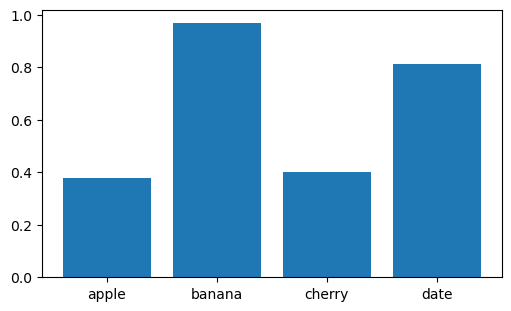

In [16]:
categories = ['apple', 'banana', 'cherry', 'date']
values = np.random.rand(len(categories))

fig, ax = plt.subplots(figsize=(5, 3), layout='constrained')
ax.bar(categories, values)

17. Let's create a plot that demonstrates the use of both a secondary y-axis and a secondary x-axis with different scales:
- Generate a time series `t` ranging from 0 to 2pi with 100 points
- Create two datasets: `s` for a sine wave and `l` for a linearly increasing dataset between 0 and the length of t
- Plot both datasets on the same figure: on the first subplot plot the sine wave on the left y axis and the linear data on the right y axis using `twinx()`, on the second subplot plot the sine wave with a secondary x axis that converts radians to degrees using `secondary_xaxis()`

Text(0.5, 0, 'Angle [°]')

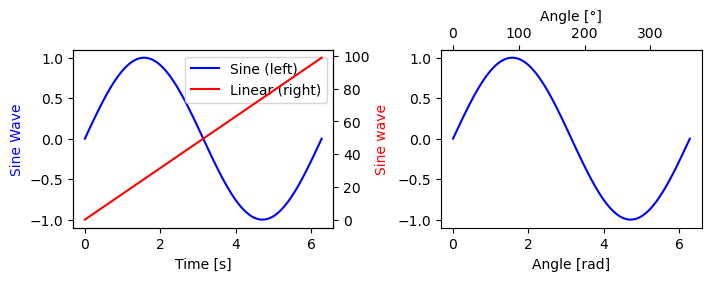

In [17]:
t = np.linspace(0, 2 * np.pi, 100)
s = np.sin(t)
l = np.arange(len(t))

fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(7, 2.7), layout='constrained')

l1, = ax1.plot(t, s, 'b-', label='Sine wave')
ax1.set_ylabel('Sine Wave', color='b')
ax1.set_xlabel('Time [s]')
ax2 = ax1.twinx()
l2, = ax2.plot(t, l, 'r-', label='Linear data')
ax2.set_ylabel('Linear data', color='r')

ax1.legend([l1, l2], ['Sine (left)', 'Linear (right)'])

ax3.plot(t, s, 'b-')
ax3.set_xlabel('Angle [rad]')
ax2.set_ylabel('Sine wave')

ax4 = ax3.secondary_xaxis('top', functions=(np.rad2deg, np.deg2rad))
ax4.set_xlabel('Angle [°]')

## 8. Colour mapped data

18. Let's create a series of suplots to practice visualizing data with colormaps:
- Generate x and y data using `x, y = np.meshgrid(np.linspace(-3, 3, 128), np.linspace(-3, 3, 128))`
- Generate Z data using `z = (1 - x/2 + x**5 + y**3) * np.exp(-x**2 - y**2)
- Generate 2 datsets to use for our scatter plot using `np.random.randn(100)` and generate a third dataset to use for the colors using `np.random.rand(100)`
- Create 4 subplots in a 2x2 grid
- First plot: use `pcolormesh()` to display z values with a colormap
- Second plot: use `contourf()` to create a filled contour plot
- Third plot: use `imshow()` with a logarithmic color scale (`LogNorm`) to represent the square of z values
- Fourth plot: create a scatter plot where the colour of each point depends on that third datset we made
- Add colorbars to each plot to indicate the mapping between data and colours

Text(0.5, 1.0, 'scatter()')

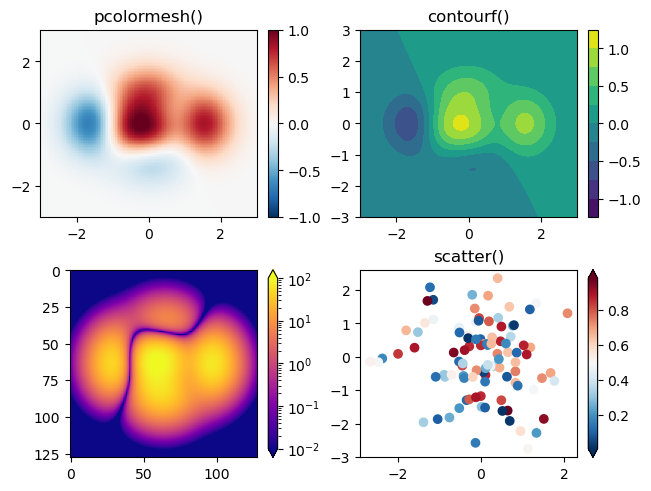

In [18]:
from matplotlib.colors import LogNorm

x,y = np.meshgrid(np.linspace(-3, 3, 128), np.linspace(-3, 3, 128))
z = (1 - x/2 + x**5 + y**3) * np.exp(-x**2 - y**2)

data1 = np.random.randn(100)
data2 = np.random.randn(100)
data3 = np.random.rand(100)

fig, axs = plt.subplots(2, 2, layout='constrained')

plot1 = axs[0,0].pcolormesh(x, y, z, vmin=-1, vmax=1, cmap='RdBu_r')
fig.colorbar(plot1, ax=axs[0, 0])
axs[0,0].set_title('pcolormesh()')

plot2 = axs[0, 1].contourf(x, y, z, levels=np.linspace(-1.25, 1.25, 11))
fig.colorbar(plot2, ax=axs[0,1])
axs[0,1].set_title('contourf()')

plot3 = axs[1, 0].imshow(z**2 * 100, cmap='plasma', norm=LogNorm(vmin=0.01, vmax=100))
fig.colorbar(plot3, ax=axs[1,0], extend='both')
axs[1, 1].set_title('scatter()')

plot4 = axs[1, 1].scatter(data1, data2, c=data3, cmap='RdBu_r')
fig.colorbar(plot4, ax=axs[1, 1], extend='both')
axs[1, 1].set_title('scatter()')

## 9. Multiple figures/axes

19. Let's create a figure with multiple subplots using the `suplot_mosiac` method. Each subplot should have its own distinct data and be customized with titles, labels, and a legend. You will also need to manipulate different azes in a single figure and work with multiple figures in a single program:
- Create a figure using `plt.subplot_mosaic()` with the following layout: `[['top', 'top', 'right'], ['bottom-left', 'bottom-right', 'right']]` with the layout set to `constrained` so the figure is properly spaced
- In the `top` subplot, plot a sine wave over values from 0 to 2pi
- In the `bottom-left` subplot, plot a cosine wabe over 0 to 2pi
- In the `bottom-right` subplot, create a scatter plot of random points
- In the `right` subplot, create a bar chart showing any categorical data of your choice
- Give appropriate titles to each subplot using `set_title()`
- Label the x-axis and y-axis for the sine and cosine plots
- Add a legend to the sine and cosine plots indicating which function is being plotted
- For the bar chart, label the bars and set different colours for each category
- Create a new figure using `plt.figure()` and plot a simple line graph of exponential growth in a single subplot
- Ensure both the mosaic figure and extra figure are displayed properly 

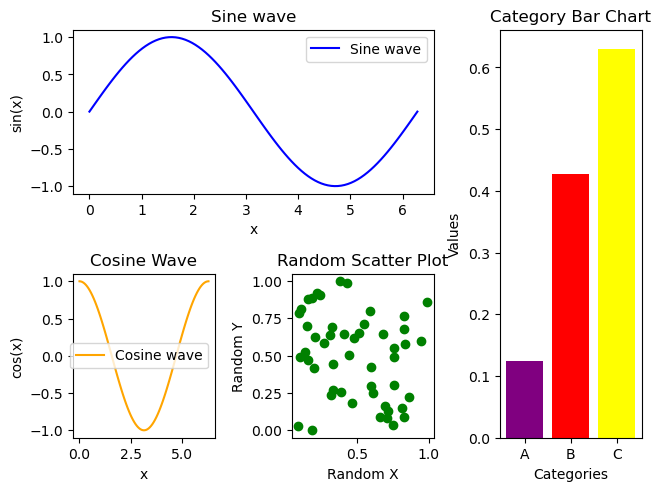

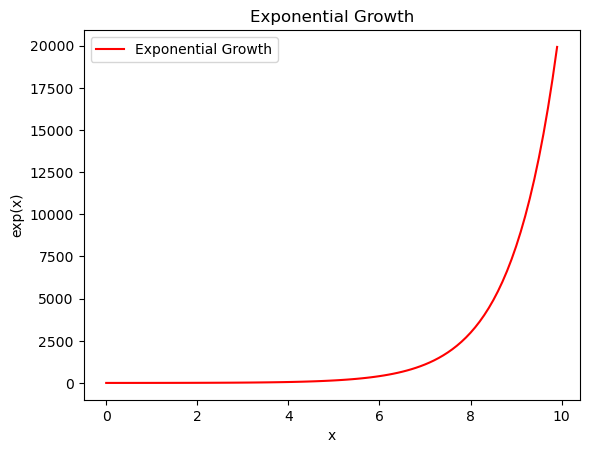

In [19]:
x = np.linspace(0,2 * np.pi, 100)
y_sin = np.sin(x)
y_cos = np.cos(x)
categories = ['A', 'B', 'C']
values = np.random.rand(len(categories))

fig, ax = plt.subplot_mosaic([['top', 'top', 'right'], ['bottom-left', 'bottom-right', 'right']], layout='constrained')

ax['top'].plot(x, y_sin, label='Sine wave', color='blue')
ax['top'].set_title('Sine wave')
ax['top'].set_xlabel('x')
ax['top'].set_ylabel('sin(x)')
ax['top'].legend()

ax['bottom-left'].plot(x, y_cos, label='Cosine wave', color='orange')
ax['bottom-left'].set_title('Cosine Wave')
ax['bottom-left'].set_xlabel('x')
ax['bottom-left'].set_ylabel('cos(x)')
ax['bottom-left'].legend()

random_x = np.random.rand(50)
random_y = np.random.rand(50)
ax['bottom-right'].scatter(random_x, random_y, color='green')
ax['bottom-right'].set_title('Random Scatter Plot')
ax['bottom-right'].set_xlabel('Random X')
ax['bottom-right'].set_ylabel('Random Y')

ax['right'].bar(categories, values, color=['purple', 'red', 'yellow'])
ax['right'].set_title('Category Bar Chart')
ax['right'].set_xlabel('Categories')
ax['right'].set_ylabel('Values')

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
x_exp = np.arange(0, 10, 0.1)
y_exp = np.exp(x_exp)
ax2.plot(x_exp, y_exp, label='Exponential Growth', color='red')
ax2.set_title('Exponential Growth')
ax2.set_xlabel('x')
ax2.set_ylabel('exp(x)')
ax2.legend()